# Problema 3 "El precio de las cosas y más" (Grupal)
David Morais  
Eudald Pizzaro  
Marc Teixidó  
Joan Montobio  

In [54]:
#!pip install apafib --upgrade --quiet
#!pip install -U numpy scipy scikit-learn pandas matplotlib seaborn statsmodels yellowbrick

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import Binarizer, MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.preprocessing import PolynomialFeatures
from IPython.display import display

import missingno as msno

import pandas as pd
from pandas.plotting import scatter_matrix
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 3)
from sklearn import set_config
import warnings

set_config(display='text')
warnings.filterwarnings('ignore')
pd.set_option('display.precision', 3)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,  KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from apafib import load_BCN_precios

### a)
 Dividid el conjunto de datos en entrenamiento y test (60 %/40 %).

 Haced una exploración
mínima del conjunto de datos de entrenamiento observando las relaciones entre las variables,
especialmente con la variable objetivo (índice IBEX).

Describid las cosas que hayáis visto que
os parezcan interesantes.

Transformad las variables adecuadamente para poder ajustar un
modelo de regresión tanto el conjunto de entrenamiento como el de test

In [4]:
data = load_BCN_precios()
data.head()
data.describe(include='all').T

,Frutas-Ceba,Frutas-Patata,Frutas-Plàtan,Frutas-Poma,Frutas-Taronja,Carnes-Llenguado,Carnes-Llobarro,Carnes-Lluç,Carnes-Orada,Carnes-Pollastre,Carnes-Porcí,IBEX-IBEX,Temperatura-Barcelona - el Raval,Temperatura-Barcelona - Observatori Fabra,Temperatura-Barcelona - Zona Universitària,Matriculaciones-Turismes,Matriculaciones-Vehicles,ContaminacionAcustica-19h,ContaminacionAcustica-4h
Dia,,,,,,,,,,,,,,,,,,,
2021-09-15,0.32,0.35,1.0,0.900,0.9,13.800,5.0,4.000,4.5,0.890,1.200,8635.400,26.79,24.38,26.07,33.0,119.000,66.41,50.94
2021-09-16,0.30,0.43,1.0,0.900,0.9,13.600,5.0,3.800,4.5,0.899,1.196,8733.700,24.46,21.46,23.99,53.0,124.000,66.44,50.68
2021-09-17,0.30,0.43,1.0,0.900,0.9,13.600,5.5,4.000,4.5,0.907,1.191,8760.900,24.95,22.20,23.92,47.0,109.000,66.65,51.08
2021-09-18,0.30,0.43,1.0,0.867,0.9,13.500,5.5,4.000,4.5,0.916,1.187,8725.733,23.48,20.41,22.18,47.0,116.333,65.80,53.54
2021-09-19,0.30,0.43,1.0,0.833,0.9,13.533,5.5,4.267,4.5,0.924,1.183,8690.567,22.20,19.01,21.28,47.0,123.667,65.19,53.83


,count,mean,std,min,25%,50%,75%,max
Frutas-Ceba,630.0,0.575,0.283,0.22,0.270,0.520,0.750,1.25
Frutas-Patata,630.0,0.577,0.126,0.35,0.480,0.600,0.650,0.85
Frutas-Plàtan,630.0,1.806,0.598,1.00,1.300,1.800,2.000,3.20
Frutas-Poma,630.0,0.873,0.194,0.60,0.733,0.800,1.000,1.60
Frutas-Taronja,630.0,0.965,0.198,0.40,0.800,0.900,1.100,1.60
Carnes-Llenguado,630.0,17.602,2.638,12.80,15.000,18.000,19.125,29.00
Carnes-Llobarro,630.0,5.972,0.476,5.00,5.600,5.900,6.400,6.85
Carnes-Lluç,630.0,4.640,0.781,2.50,4.000,4.600,5.167,7.50
Carnes-Orada,630.0,4.928,0.411,4.20,4.571,4.942,5.300,5.80
Carnes-Pollastre,630.0,1.304,0.156,0.89,1.200,1.334,1.420,1.52


### Visualización de los datos

<Figure size 2280x1900 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Matriz de correlaciones (Pearson)')

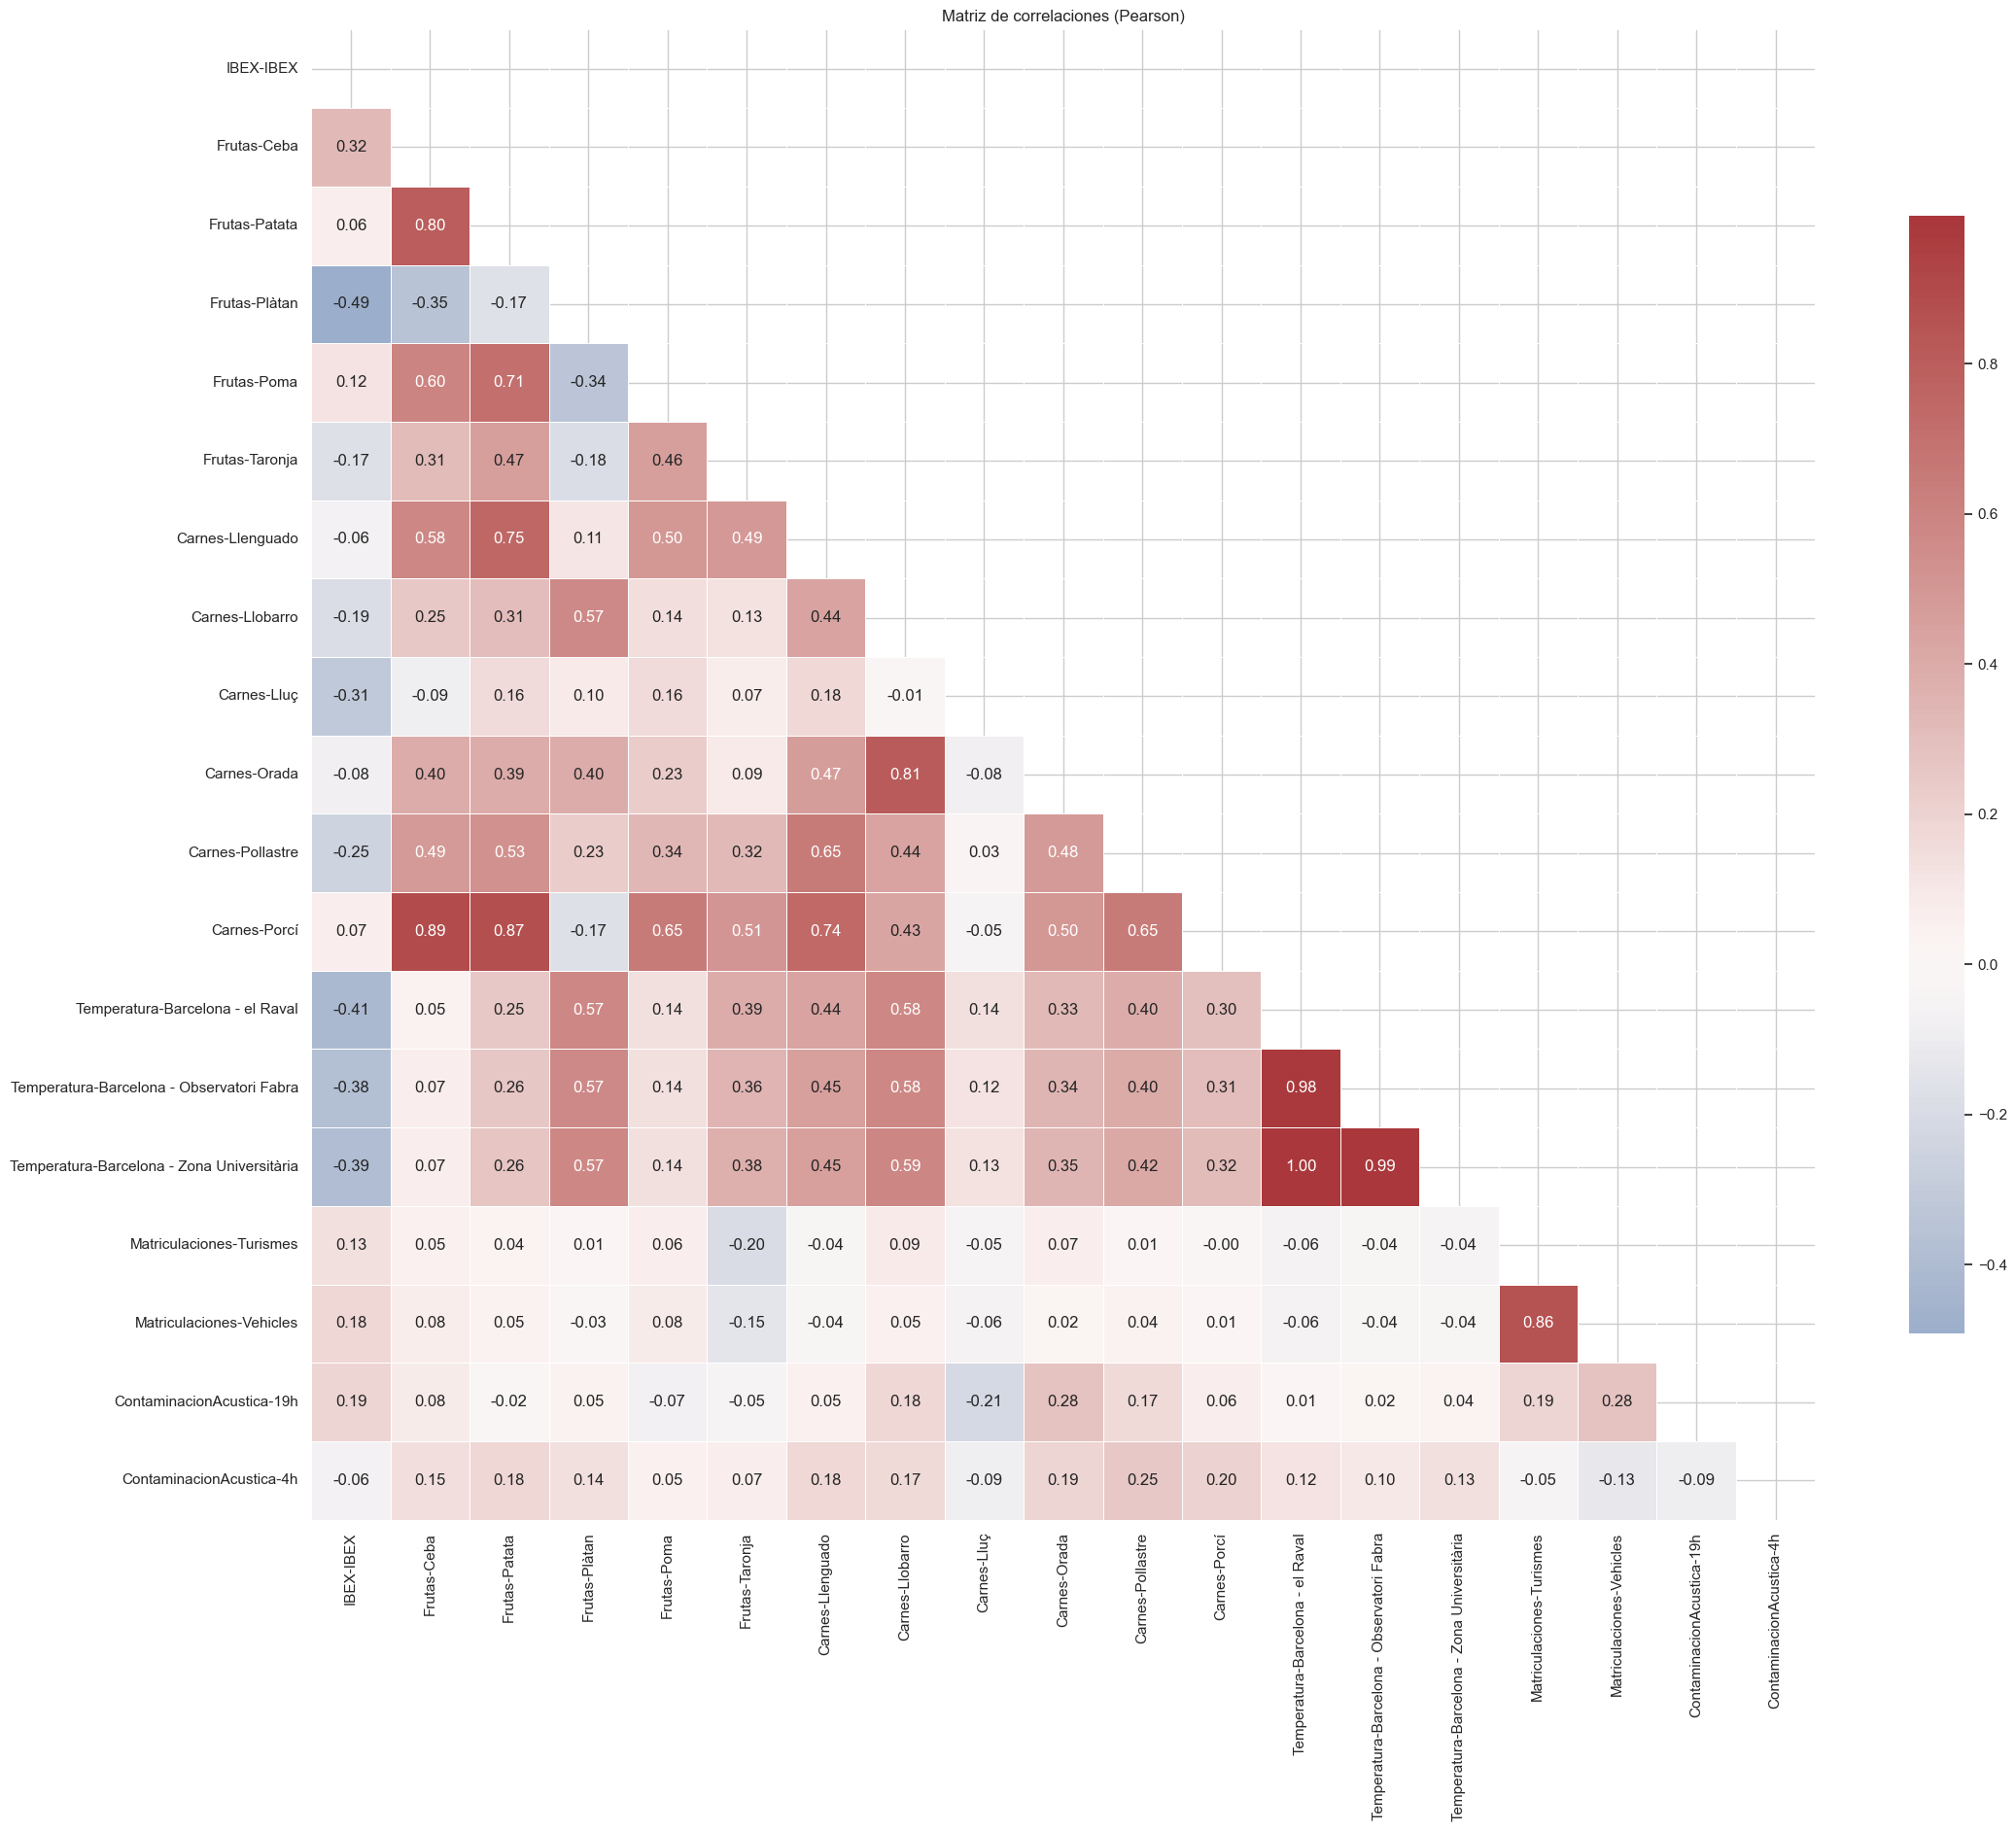

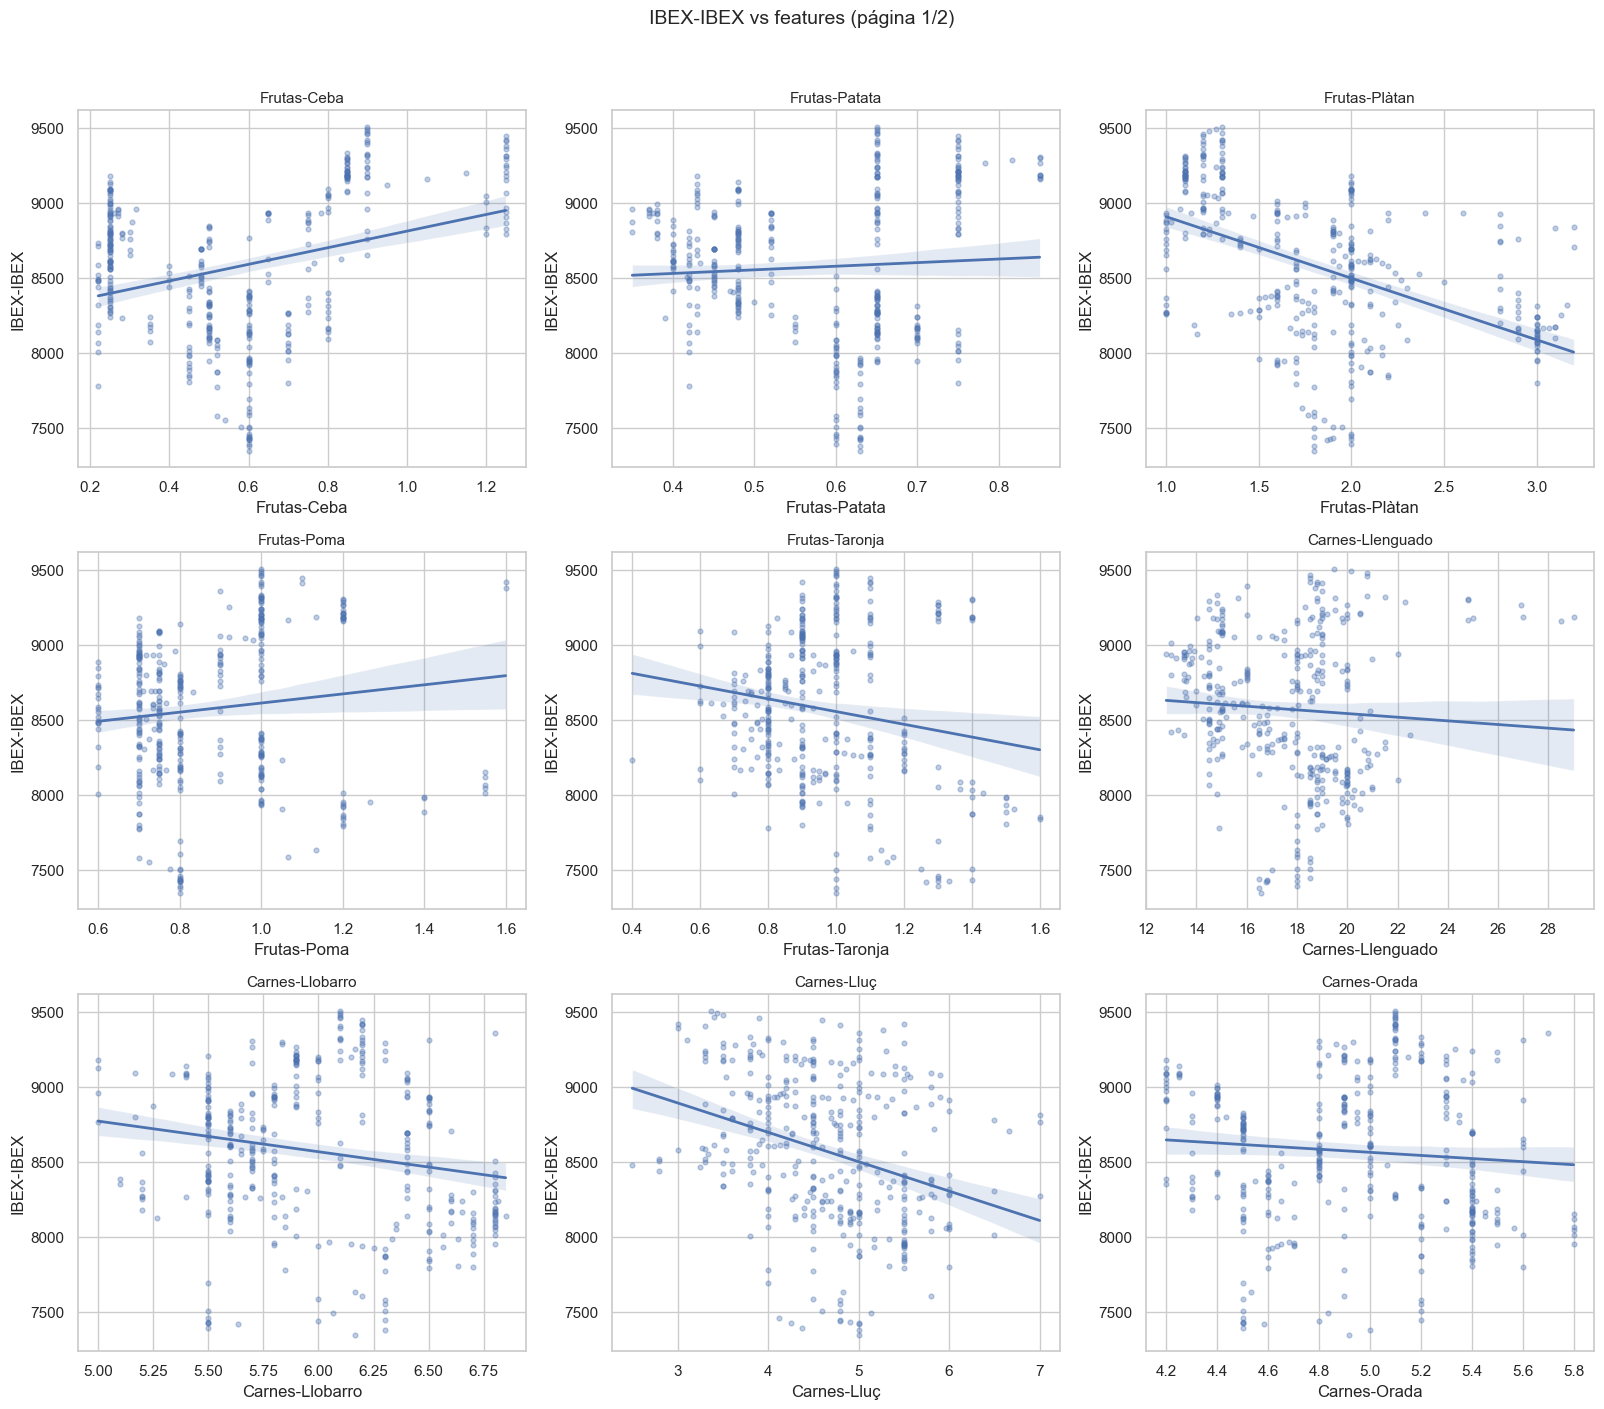

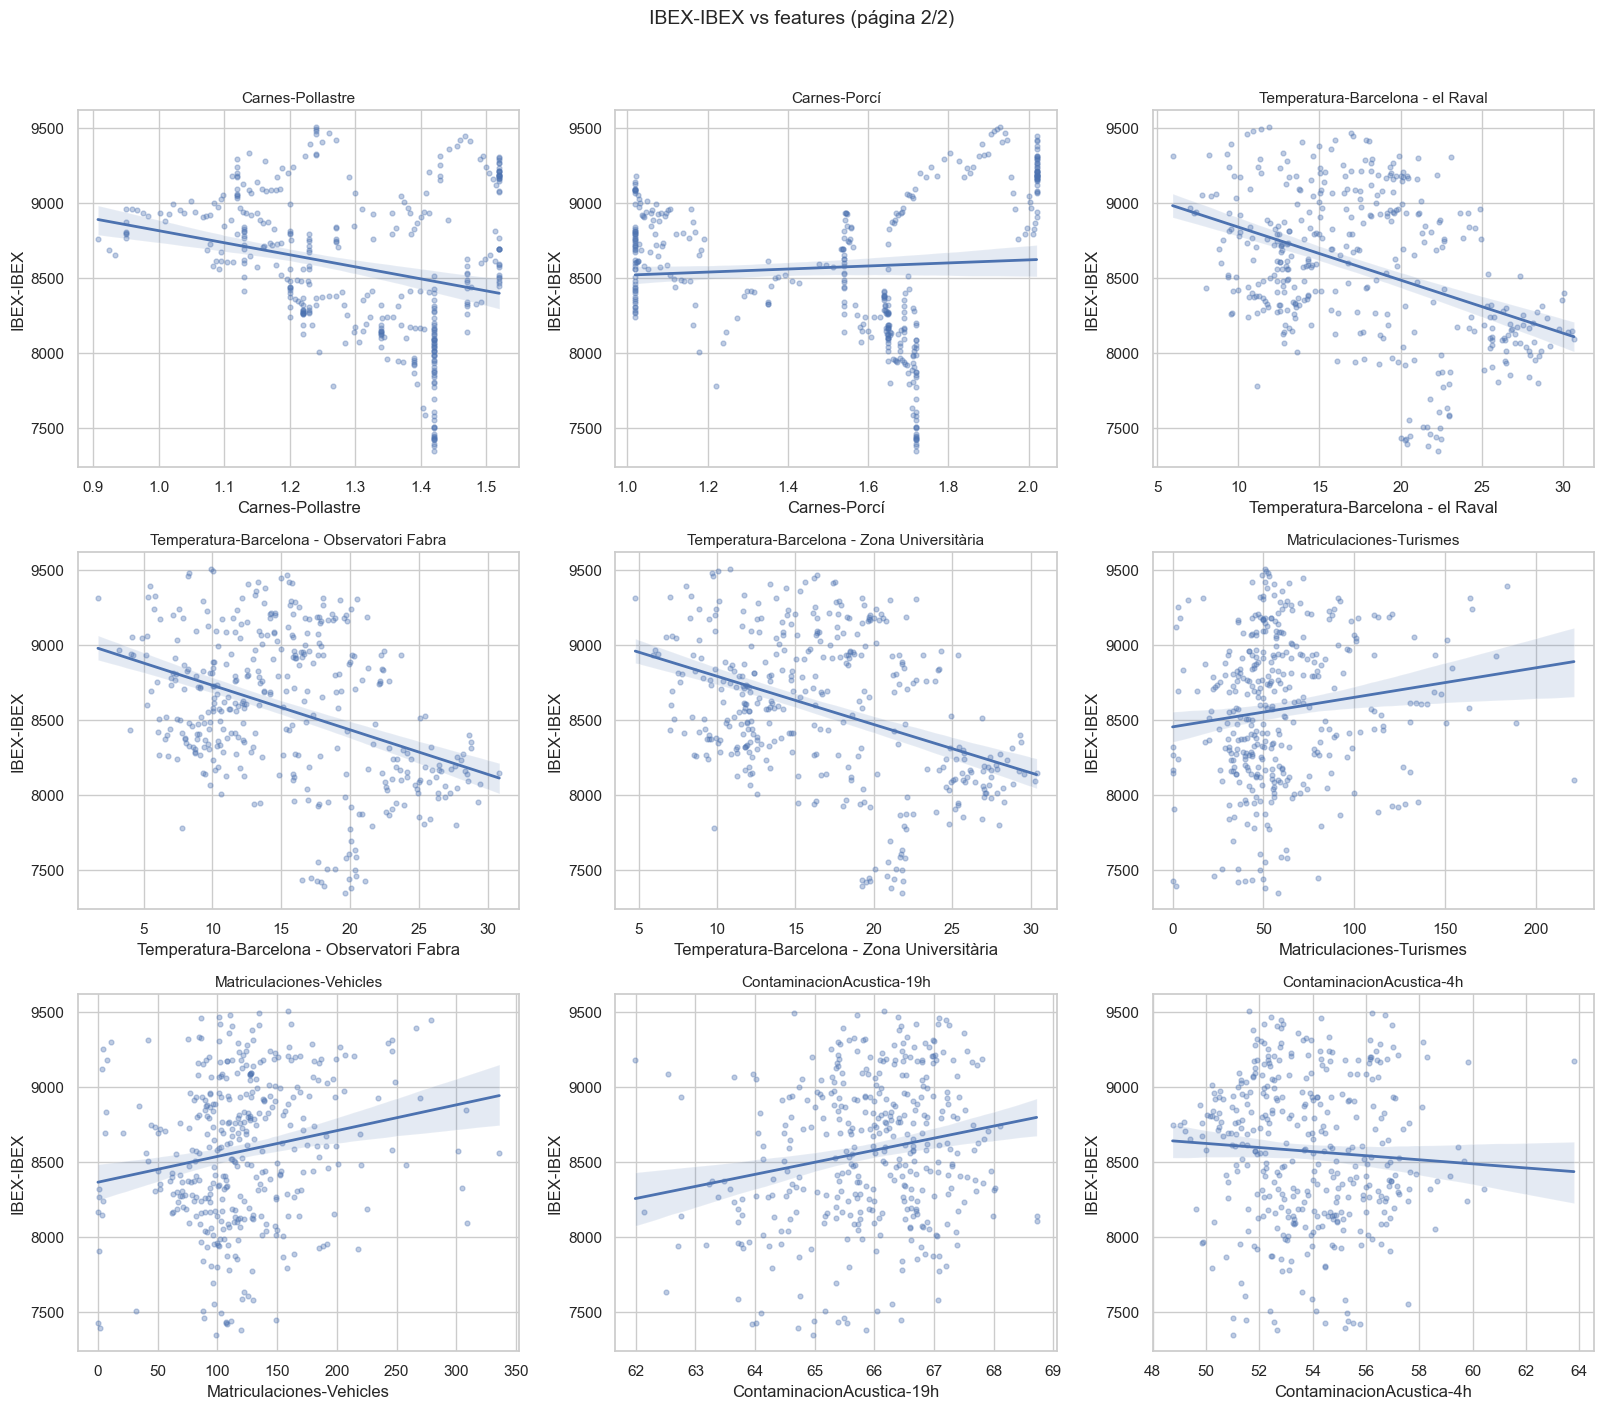

Top correlaciones con IBEX-IBEX


,pearson
Frutas-Plàtan,-0.491
Temperatura-Barcelona - el Raval,-0.411
Temperatura-Barcelona - Zona Universitària,-0.392
Temperatura-Barcelona - Observatori Fabra,-0.380
Frutas-Ceba,0.318
Carnes-Lluç,-0.315
Carnes-Pollastre,-0.251
ContaminacionAcustica-19h,0.191
Carnes-Llobarro,-0.190
Matriculaciones-Vehicles,0.185


In [5]:
train, test = train_test_split(data, test_size=0.4, random_state=0)

target_col   = "IBEX-IBEX"  
alpha_pts    = 0.35        
ncols_grid   = 3            
nrows_grid   = 3            
use_lowess   = False       
q_bins=20

sns.set_theme(context="notebook", style="whitegrid")

num_cols = train.select_dtypes(include="number").columns.tolist()
x_cols = [c for c in num_cols if c != target_col]

corr_cols = [target_col] + x_cols
corr = train[corr_cols].corr(method="pearson")

plt.figure(figsize=(1.2*len(corr_cols), 1.0*len(corr_cols)))
mask = np.triu(np.ones_like(corr, dtype=bool))  # solo triángulo inferior
sns.heatmap(corr, mask=mask, cmap="vlag", center=0, annot=len(corr_cols) <= 20, fmt=".2f",
            linewidths=.5, cbar_kws={"shrink": .75})
plt.title("Matriz de correlaciones (Pearson)")
plt.tight_layout()
plt.show()

def plot_feature_pages(df, features, ycol, ncols=3, nrows=3, alpha=0.35, use_lowess=False, q_bins=20):
    per_page = ncols * nrows
    pages = int(np.ceil(len(features) / per_page))
    for p in range(pages):
        feats = features[p*per_page:(p+1)*per_page]
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5.4*ncols, 4.6*nrows))
        axes = np.atleast_1d(axes).ravel()

        for ax, col in zip(axes, feats):
            sub = df[[col, ycol]].dropna()
            if sub.empty:
                ax.text(0.5, 0.5, f"Sin datos para {col}", ha="center")
                ax.axis("off")
                continue

            sns.regplot(
                data=sub, x=col, y=ycol,
                scatter_kws=dict(s=12, alpha=alpha),
                line_kws=dict(linewidth=2),
                lowess=use_lowess, ax=ax
            )


            ax.set_title(col, fontsize=11)
            ax.set_xlabel(col)
            ax.set_ylabel(ycol)

        for ax in axes[len(feats):]:
            ax.axis("off")

        plt.suptitle(f"{ycol} vs features (página {p+1}/{pages})", y=1.02, fontsize=14)
        plt.tight_layout()
        plt.show()

# Ejecuta la rejilla paginada
plot_feature_pages(
    train, x_cols, target_col,
    ncols=ncols_grid, nrows=nrows_grid,
    alpha=alpha_pts, use_lowess=use_lowess, q_bins=q_bins
)


corr_target = train[x_cols].corrwith(train[target_col]).sort_values(key=lambda s: s.abs(), ascending=False)
print("Top correlaciones con", target_col)
display(pd.DataFrame({"pearson": corr_target}).head(20))

Gracias a la matriz de correlaciones podemos observar que las variables que tienen una correlación más significativa són las $temperaturas$, el $platan$, el $lluç$, $pollastre$ y $ceba$. Cabe destacar que todas las correlaciones son negativas (excepto $ceba$). Vemos que independientemente las temperaturas estan todas fuertemente correlacionadas entre ellas (la mayoria muy cerca del 1), por lo tanto den la misma información respecto la variable objetivo ($IBEX$). 

También podem observar que en los graficos de **feature vs IBEX** las variables más correlacionadas muestran una tendencia más clara.

### Preprocesado de datos

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 630 entries, 2021-09-15 to 2023-06-06
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Frutas-Ceba                                 630 non-null    float64
 1   Frutas-Patata                               630 non-null    float64
 2   Frutas-Plàtan                               630 non-null    float64
 3   Frutas-Poma                                 630 non-null    float64
 4   Frutas-Taronja                              630 non-null    float64
 5   Carnes-Llenguado                            630 non-null    float64
 6   Carnes-Llobarro                             630 non-null    float64
 7   Carnes-Lluç                                 630 non-null    float64
 8   Carnes-Orada                                630 non-null    float64
 9   Carnes-Pollastre                            630 non-null    float64
 10  Car

In [7]:
data.head()


,Frutas-Ceba,Frutas-Patata,Frutas-Plàtan,Frutas-Poma,Frutas-Taronja,Carnes-Llenguado,Carnes-Llobarro,Carnes-Lluç,Carnes-Orada,Carnes-Pollastre,Carnes-Porcí,IBEX-IBEX,Temperatura-Barcelona - el Raval,Temperatura-Barcelona - Observatori Fabra,Temperatura-Barcelona - Zona Universitària,Matriculaciones-Turismes,Matriculaciones-Vehicles,ContaminacionAcustica-19h,ContaminacionAcustica-4h
Dia,,,,,,,,,,,,,,,,,,,
2021-09-15,0.32,0.35,1.0,0.900,0.9,13.800,5.0,4.000,4.5,0.890,1.200,8635.400,26.79,24.38,26.07,33.0,119.000,66.41,50.94
2021-09-16,0.30,0.43,1.0,0.900,0.9,13.600,5.0,3.800,4.5,0.899,1.196,8733.700,24.46,21.46,23.99,53.0,124.000,66.44,50.68
2021-09-17,0.30,0.43,1.0,0.900,0.9,13.600,5.5,4.000,4.5,0.907,1.191,8760.900,24.95,22.20,23.92,47.0,109.000,66.65,51.08
2021-09-18,0.30,0.43,1.0,0.867,0.9,13.500,5.5,4.000,4.5,0.916,1.187,8725.733,23.48,20.41,22.18,47.0,116.333,65.80,53.54
2021-09-19,0.30,0.43,1.0,0.833,0.9,13.533,5.5,4.267,4.5,0.924,1.183,8690.567,22.20,19.01,21.28,47.0,123.667,65.19,53.83


Podemos observar que no hay valores nulos en el dataset y que todas las variables son de tipo float64. Asi que no es necesario tratar con valores nulos o categoricos.

In [8]:
def normalizeValues(X, y, scaler=None):
    """
        X es el conjunto de variables sin la variable respuesta
        y es la variable respuesta (indice IBEX)
    """
    X = X.copy()

    if scaler is None:
        scaler = MinMaxScaler()
        X[X.columns] = scaler.fit_transform(X[X.columns])
    else:
        X[X.columns] = scaler.transform(X[X.columns])

    return X, y, scaler

def centerData(X):
    X = X.copy()
    if scaler is None:
        scaler = StandardScaler()
        X[X.columns] = scaler.fit_transform(X[X.columns])
    else:
        X[X.columns] = scaler.transform(X[X.columns])
    return X


---

### b)

Aplicad algún método de reducción de dimensionalidad a los datos de entrenamiento y
comentad lo que se pueda apreciar en la visualización.

Pensad en qué podéis representar
sobre la transformación.

Vamos a usar PCA para reducir la dimensionalidad de los datos y visualizar las dos primeras componentes principales. Si PCA no es suficiente, podemos considerar usar t-SNE para una mejor visualización.

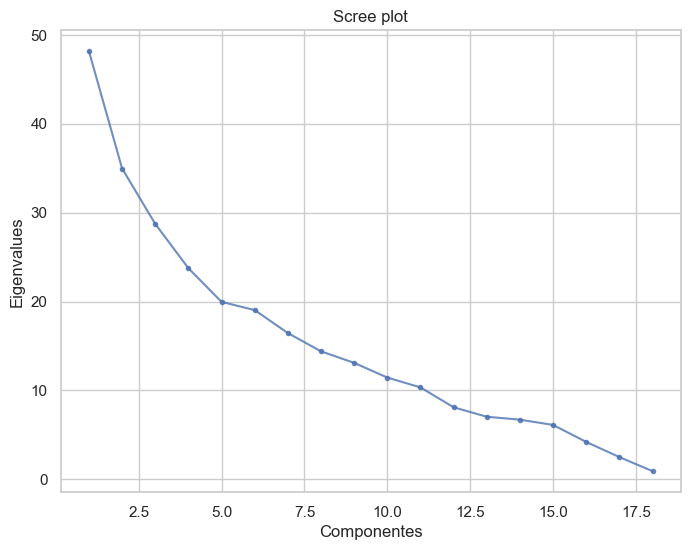

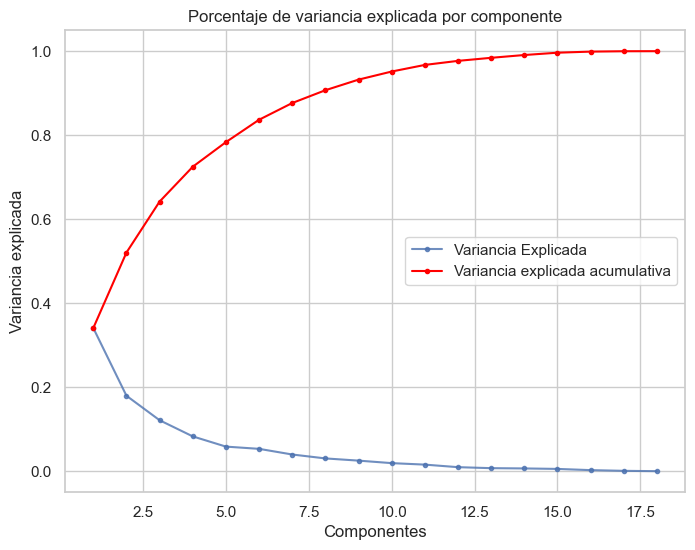

In [9]:
# Primero para usar PCA tenemos que centrar el dataset
train_std = train.copy()
train_std[train_std.columns] = StandardScaler().fit_transform(train[train.columns])
train_std = train_std.drop(columns='IBEX-IBEX')
train_std.describe()

# Ahora podemos usar PCA
pca = PCA().fit(train_std[train_std.columns])

fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(pca.singular_values_ )+1),pca.singular_values_ ,alpha=0.8,marker='.');
y_label = plt.ylabel('Eigenvalues');
x_label = plt.xlabel('Componentes');
plt.title('Scree plot');

fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

In [10]:
# Número de componentes para diferentes umbrales
thresholds = [0.70, 0.80, 0.90]
cumsum = np.cumsum(pca.explained_variance_ratio_)

print("Componentes necesarias según umbral de varianza explicada:")
for threshold in thresholds:
    n_components = np.argmax(cumsum >= threshold) + 1
    variance_explained = cumsum[n_components - 1]
    print(f"  {threshold*100:.0f}%: {n_components} componentes (real: {variance_explained*100:.2f}%)")

print(f"\nTotal de variables originales: {train_std.shape[1]}")
print(f"Reducción dimensional: {(1 - 5/train_std.shape[1])*100:.1f}%")

Componentes necesarias según umbral de varianza explicada:
  70%: 4 componentes (real: 72.49%)
  80%: 6 componentes (real: 83.68%)
  90%: 8 componentes (real: 90.70%)

Total de variables originales: 18
Reducción dimensional: 72.2%


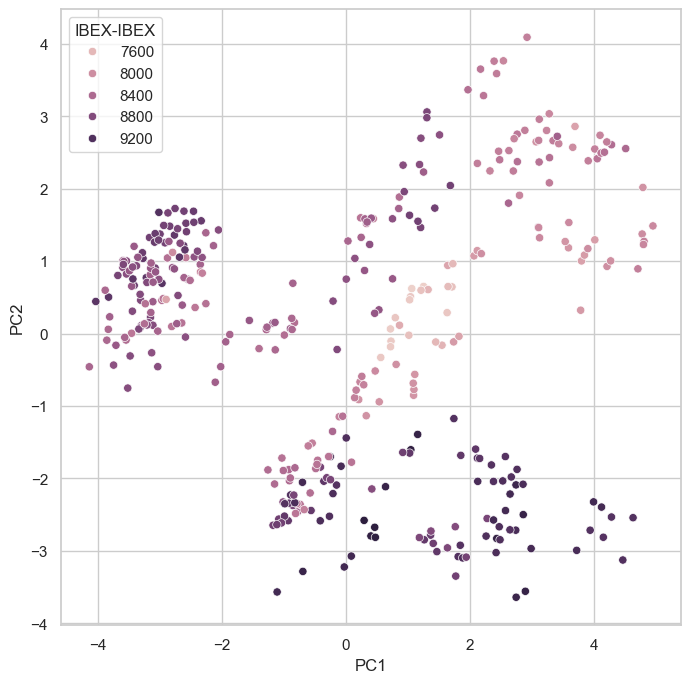

In [11]:
transformed_data = pca.transform(train_std[train_std.columns])
train_std[['PC1', 'PC2', 'PC3']] = transformed_data[:,:3]
train_std['IBEX-IBEX'] = train['IBEX-IBEX'].values
fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', hue='IBEX-IBEX', data=train_std)

Podemos ver que más o menos los datos se agrupan en torno a ciertas regiones, lo que indica que hay patrones subyacentes en los datos que podrían ser útiles para la predicción del índice IBEX. Sobretodo para los valores más altos del índice IBEX, que parecen agruparse en la parte inferior derecha del gráfico.

Vamos a probar ahora usar t-SNE para ver si podemos obtener una mejor visualización de los datos.

Text(0.5, 1.0, 't-SNE projection colored by IBEX-IBEX')

Text(0.5, 0, 't-SNE1')

Text(0, 0.5, 't-SNE2')

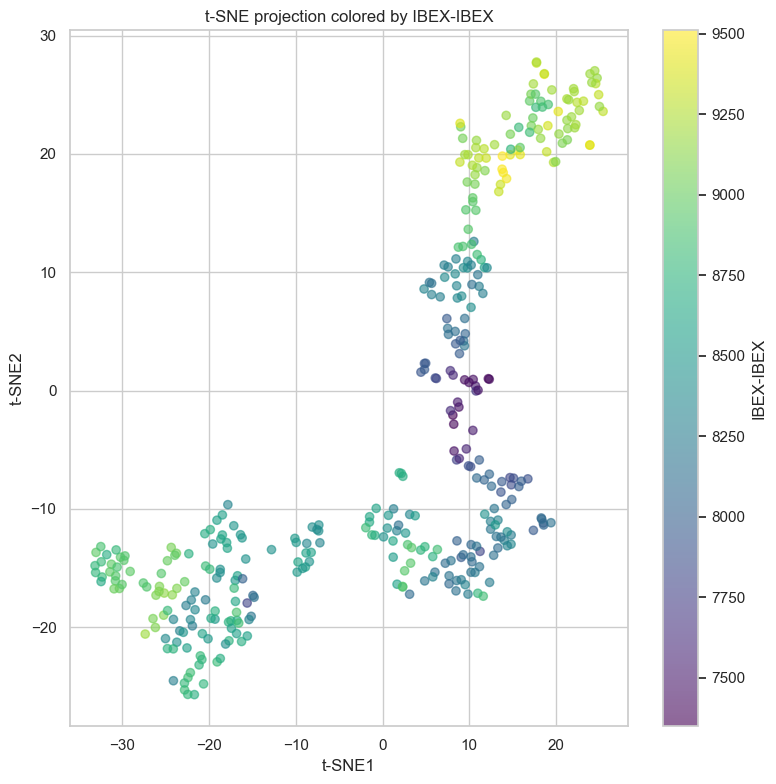

In [12]:
from sklearn.manifold import TSNE

X_tsne = train_std.drop(columns='IBEX-IBEX')
y_tsne = train_std['IBEX-IBEX']

tsne = TSNE(
    n_components = 2,
    perplexity=30,
    learning_rate=200,
    max_iter=5000,
    random_state=42,
    n_jobs=-1
)

X_tsne_embedded = tsne.fit_transform(X_tsne)

tsne_df = pd.DataFrame({
    't-SNE1': X_tsne_embedded[:,0],
    't-SNE2': X_tsne_embedded[:,1],
    'IBEX-IBEX': y_tsne.values
})

fig, ax = plt.subplots(figsize=(8,8))

sc = ax.scatter(
    tsne_df['t-SNE1'],
    tsne_df['t-SNE2'],
    c=tsne_df['IBEX-IBEX'],
    cmap=('viridis'),
    alpha=0.6
)

ax.set_title('t-SNE projection colored by IBEX-IBEX')
ax.set_xlabel('t-SNE1')
ax.set_ylabel('t-SNE2')

cbar = fig.colorbar(sc, ax=ax)
cbar.set_label('IBEX-IBEX')

plt.tight_layout()
plt.show()

Parece que haya clusters definidos, pero no son clusters muy lejanos ya que el valor entre componentes canvia de forma gradual, lo que nos indica que es una transición continua. Nos dice que el conjunto de variables utilizado, contiene información coherente con el nivel del $IBEX$.

---

### c)

Ajustad una regresión lineal, una regresión Ridge y una regresión LASSO a los datos.

¿Os
parece suficientemente bueno el resultado?

Representad los valores de la variable objetivo
para el conjunto de test contra las predicciones y representad los residuos.

¿Qué modelo
os parece mejor?

In [ ]:
from sklearn.model_selection import train_test_split,  KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import set_config

In [ ]:
X_train = train.loc[:, train.columns != 'IBEX-IBEX']
y_train = train['IBEX-IBEX']

X_test = test.loc[:, test.columns != 'IBEX-IBEX']
y_test = test['IBEX-IBEX']
# Conjuntos normalizados para LASSO y Ridge
X_train_norm, y_train_norm, scaler = normalizeValues(X_train, y_train)
X_test_norm, y_test_norm, _ = normalizeValues(X_test, y_test, scaler)


In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

LinearRegression()

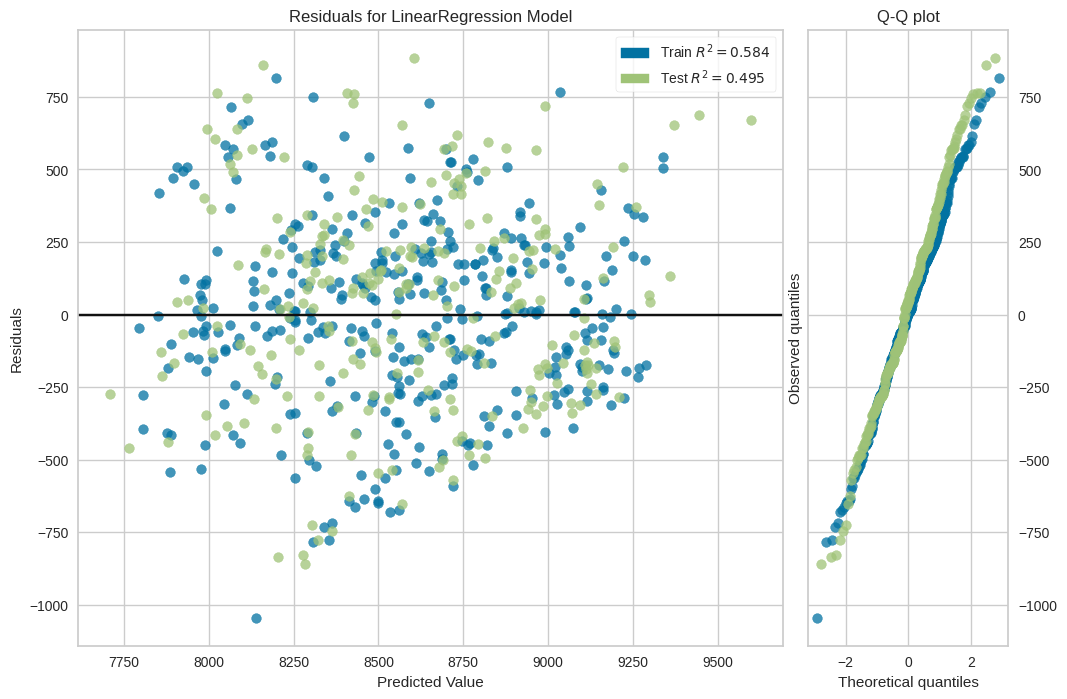

In [ ]:
from yellowbrick.regressor import residuals_plot

# Grafica con los residuos del entrenamiento y el test con el qqplot o histograma
plt.figure(figsize=(12,8));
viz = residuals_plot(lr, X_train, y_train, X_test, y_test, is_fitted=True, qqplot=True, hist=False);

Podemos ver que el $R^2$ es bastante bajo tanto para el train como para el test

<Figure size 800x800 with 0 Axes>

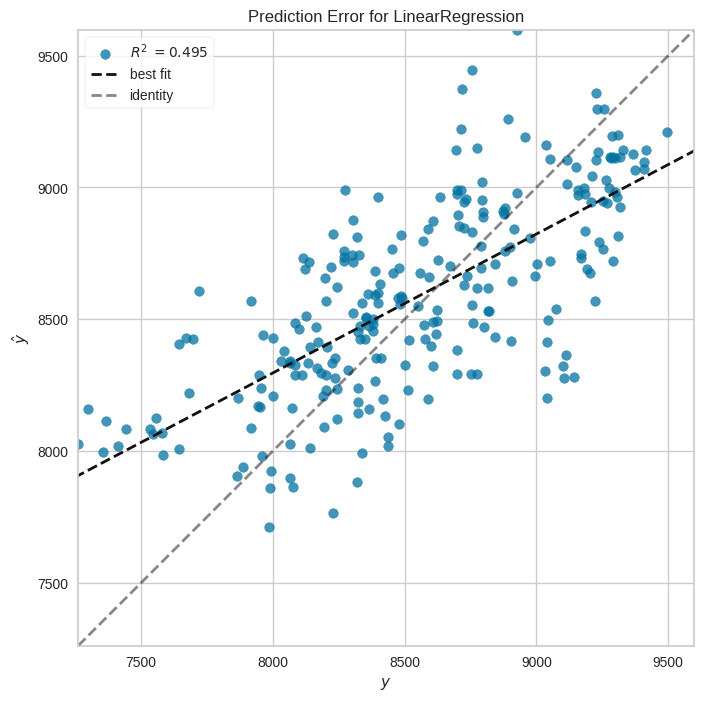

In [ ]:
from yellowbrick.regressor import prediction_error

plt.figure(figsize=(8,8))
visualizer = prediction_error(lr, X_test, y_test, is_fitted=True)

In [ ]:
# Vamos a calcular algunas metricas más para ver el rendimiento del modelo
def modelMetrics(y_train, y_pred):
    """
        Calcula las metricas del modelo
        Normalized mean squared error
        R squared
        Mean absolute error
    """
    norm_mse = 1-r2_score(y_train, y_pred)
    r_squared = r2_score(y_train, y_pred)
    mae = mean_absolute_error(y_train, y_pred)

    return norm_mse, r_squared, mae

folds_r2 = cross_val_score(lr, X_train,y_train, cv=5, scoring='r2')
lr_r2 = np.mean(folds_r2)

Probamos con Ridge y Lasso para ver si mejoran el rendimiento del modelo.

In [ ]:
lambdas = [1e-4,1e-3,1e-2,0.1, 0.5,1,5,10,50,100]
ridge_cv = RidgeCV(alphas=lambdas, cv=5,scoring='r2').fit(X_train, y_train)
print(f'Best lambda: {ridge_cv.alpha_} R2 score: {ridge_cv.best_score_:3.3f}')

Best lambda: 0.1 R2 score: 0.520


In [ ]:
lambdas = [0.87,8.7,87]
lasso_cv = LassoCV(alphas=lambdas,cv=5).fit(X_train,y_train)
lasso_r2 =  np.mean(cross_val_score(lasso_cv, X_train,y_train))
print('Best lambda:', lasso_cv.alpha_, 'R2 score:',lasso_r2)

Best lambda: 0.87 R2 score: 0.522150197579958


Podemos observar que ambas nos dan valores de $R^2$ similares a la regresión lineal, sin embargo, el modelo no esta normalizado, por lo tanto es probable que sea ese el problema, vamos a comprobarlo.

In [ ]:
r2_results = pd.DataFrame({'lr':lr_r2, 'ridge_cv':ridge_cv.best_score_, 'lasso_cv':lasso_r2},index=['CV R2'])

r2_results.loc['Test R2', :] =[r2_score(y_test,lr.predict(X_test)),
                                r2_score(y_test,ridge_cv.predict(X_test)),
                                r2_score(y_test,lasso_cv.predict(X_test))]
r2_results.loc['lambda','lr']=0
r2_results.loc['lambda','ridge_cv']=ridge_cv.alpha_
r2_results.loc['lambda','lasso_cv']=lasso_cv.alpha_
r2_results

,lr,ridge_cv,lasso_cv
CV R2,0.518,0.520,0.522
Test R2,0.495,0.495,0.497
lambda,0.000,0.100,0.870


Vamos a probar ahora con las variables normalizadas para ver si mejora el rendimiento de los modelos.

In [ ]:

lr_norm = LinearRegression().fit(X_train_norm, y_train)
folds_r2_norm = cross_val_score(lr_norm, X_train_norm, y_train, cv=5, scoring='r2')
lr_r2_norm = np.mean(folds_r2_norm)
lr_r2_test = r2_score(y_test, lr_norm.predict(X_test_norm))


lambdas = [1e-4,1e-3,1e-2,0.1,0.5,1,5,10,50,100]
ridge_cv_norm = RidgeCV(alphas=lambdas, cv=5, scoring='r2').fit(X_train_norm, y_train)
ridge_cv_r2 = ridge_cv_norm.best_score_
ridge_r2_test = r2_score(y_test, ridge_cv_norm.predict(X_test_norm))
lambdas = [0.87,8.7,87]
lasso_cv_norm = LassoCV(alphas=lambdas, cv=5, max_iter=5000, random_state=42).fit(X_train_norm, y_train)
best_alpha = lasso_cv_norm.alpha_

lasso_fixed = Lasso(alpha=best_alpha, max_iter=5000, random_state=42).fit(X_train_norm, y_train)
lasso_r2_cv = cross_val_score(lasso_fixed, X_train_norm, y_train, cv=5, scoring='r2').mean()  # CV sin re-optimizar
lasso_r2_test = r2_score(y_test, lasso_fixed.predict(X_test_norm))

r2_results_norm = pd.DataFrame(index=['CV R2','Test R2','lambda'], columns=['lr','ridge_cv','lasso_cv'])
r2_results_norm.loc['CV R2']   = [lr_r2_norm, ridge_cv_r2, lasso_r2_cv]
r2_results_norm.loc['Test R2'] = [lr_r2_test, ridge_r2_test, lasso_r2_test]
r2_results_norm.loc['lambda']  = [0, ridge_cv_norm.alpha_, best_alpha]

r2_results_norm

,lr,ridge_cv,lasso_cv
CV R2,0.518,0.52,0.513
Test R2,0.495,0.495,0.49
lambda,0,0.01,0.87


Podemos ver que despues de normalizar los datos no hay cambios significativos en el $R^2$, de hecho se mantien igual o empeora en el caso del Lasso.

<Figure size 800x800 with 0 Axes>

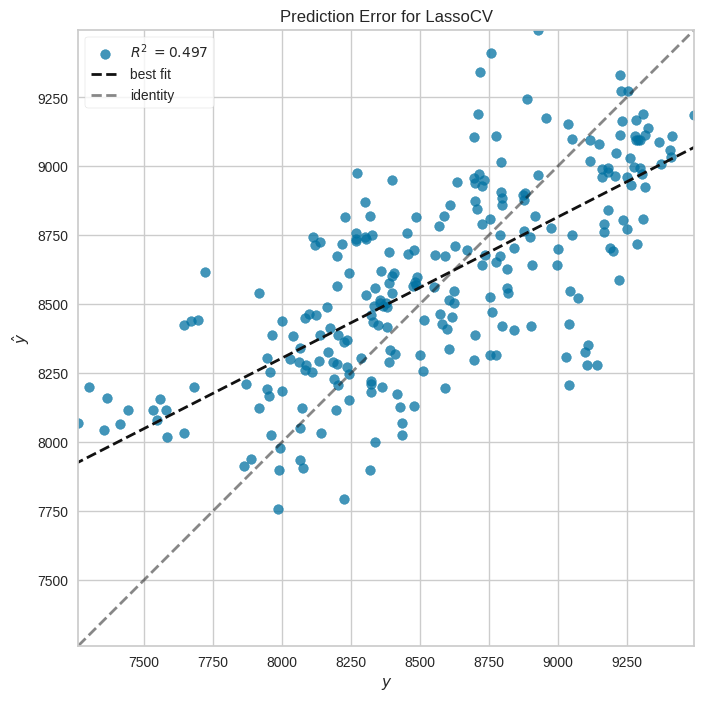

<Figure size 800x800 with 0 Axes>

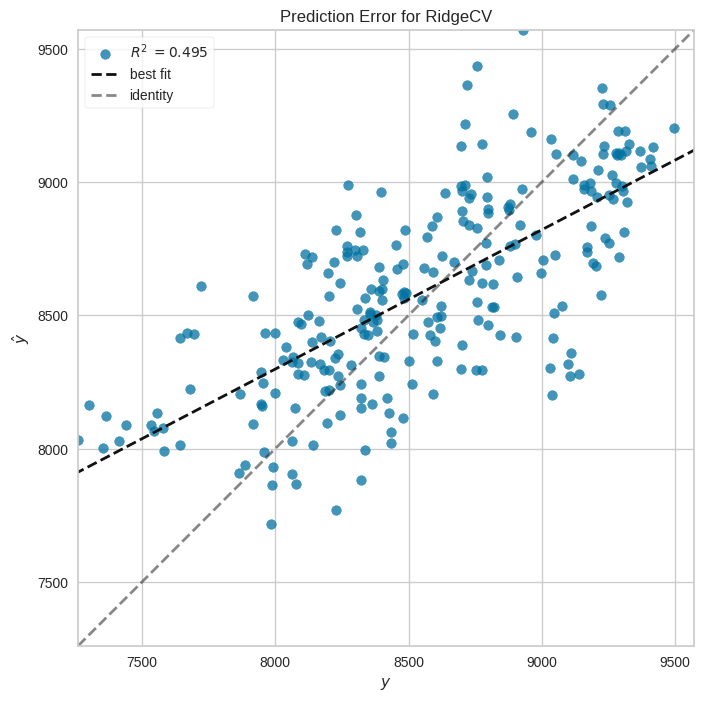

In [ ]:
from yellowbrick.regressor import prediction_error

plt.figure(figsize=(8,8))
visualizer = prediction_error(lasso_cv, X_test, y_test, is_fitted=True)

plt.figure(figsize=(8,8))
visualizer = prediction_error(ridge_cv, X_test, y_test, is_fitted=True)

---
### d)
Comprobad si el modelo LASSO identifica las variables espurias como no significativas.

Eliminadlas del modelo y volved a ajustar el mejor modelo que os ha salido ¿Cuál es el
mejor?

Comentad los resultados.

<Figure size 2000x100 with 0 Axes>

<Axes: >

,Frutas-Ceba,Frutas-Patata,Frutas-Plàtan,Frutas-Poma,Frutas-Taronja,Carnes-Llenguado,Carnes-Llobarro,Carnes-Lluç,Carnes-Orada,Carnes-Pollastre,Carnes-Porcí,Temperatura-Barcelona - el Raval,Temperatura-Barcelona - Observatori Fabra,Temperatura-Barcelona - Zona Universitària,Matriculaciones-Turismes,Matriculaciones-Vehicles,ContaminacionAcustica-19h,ContaminacionAcustica-4h
lasso_cv scaled,1168.078,-0.0,-672.047,105.656,-526.975,875.847,321.824,-674.297,-140.469,-584.647,-826.691,-78.713,0.0,-0.0,-111.358,266.563,380.927,68.049


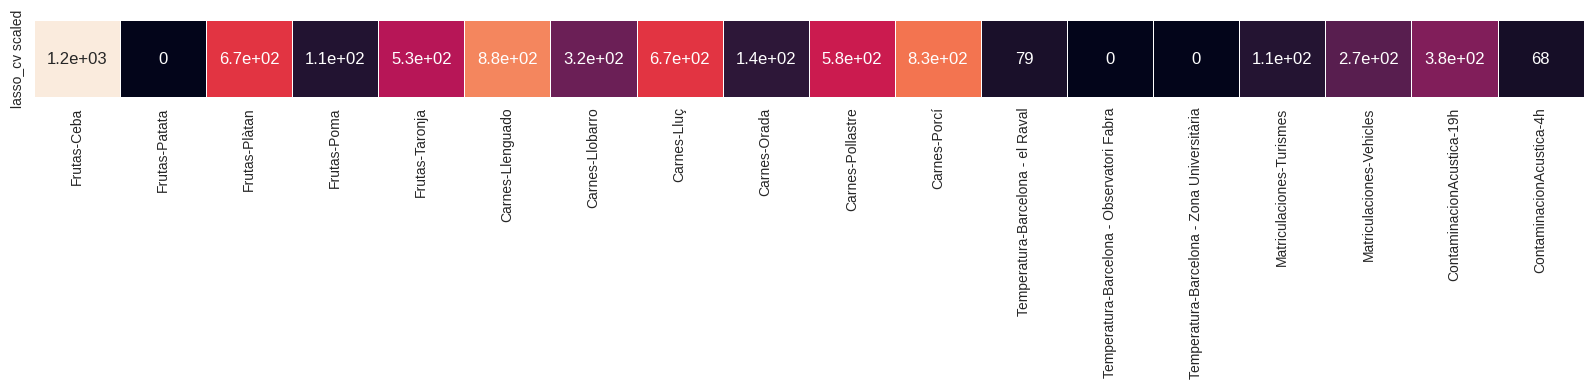

In [ ]:
weights = pd.DataFrame({'lr scaled':lr_norm.coef_, 'ridge_cv scaled':ridge_cv_norm.coef_, 'lasso_cv scaled':lasso_cv_norm.coef_},index=X_train_norm.columns)


plt.figure(figsize = (20,1))
sns.heatmap(weights.T.loc[['lasso_cv scaled'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=True)
weights.T.loc[['lasso_cv scaled'],:]

Podemos ver, como hemos dicho al principio, que las variables que relacionan temperaturas y patata son no significativas. Aunque se tiene que conservar una temperatura ya que da información.

In [ ]:
lasso_row = weights.loc[:, 'lasso_cv scaled'] if 'lasso_cv scaled' in weights.columns else weights.T.loc['lasso_cv scaled']
# Normaliza a serie 1D con índice = columnas de X
lasso_series = lasso_row.squeeze()
mask_zero = np.isclose(lasso_series.values, 0.0, atol=1e-12)
cols_drop = lasso_series.index[mask_zero]
cols_keep = lasso_series.index[~mask_zero]
print(cols_drop)

X_train_sel_norm = X_train_norm[cols_keep].copy()
X_test_sel_norm  = X_test_norm[cols_keep].copy()

lr_norm = LinearRegression().fit(X_train_sel_norm, y_train)
folds_r2_norm = cross_val_score(lr_norm, X_train_sel_norm, y_train, cv=5, scoring='r2')
lr_r2_norm = np.mean(folds_r2_norm)
lr_r2_test = r2_score(y_test, lr_norm.predict(X_test_sel_norm))


lambdas = [1e-4,1e-3,1e-2,0.1,0.5,1,5,10,50,100]
ridge_cv_norm = RidgeCV(alphas=lambdas, cv=5, scoring='r2').fit(X_train_sel_norm, y_train)
ridge_cv_r2 = ridge_cv_norm.best_score_
ridge_r2_test = r2_score(y_test, ridge_cv_norm.predict(X_test_sel_norm))
lambdas = [0.87,8.7,87]
lasso_cv_norm = LassoCV(alphas=lambdas, cv=5, max_iter=5000, random_state=42).fit(X_train_sel_norm, y_train)
best_alpha = lasso_cv_norm.alpha_

lasso_fixed = Lasso(alpha=best_alpha, max_iter=5000, random_state=42).fit(X_train_sel_norm, y_train)
lasso_r2_cv = cross_val_score(lasso_fixed, X_train_sel_norm, y_train, cv=5, scoring='r2').mean()  # CV sin re-optimizar
lasso_r2_test = r2_score(y_test, lasso_fixed.predict(X_test_sel_norm))

r2_results_norm = pd.DataFrame(index=['CV R2','Test R2','lambda'], columns=['lr','ridge_cv','lasso_cv'])
r2_results_norm.loc['CV R2']   = [lr_r2_norm, ridge_cv_r2, lasso_r2_cv]
r2_results_norm.loc['Test R2'] = [lr_r2_test, ridge_r2_test, lasso_r2_test]
r2_results_norm.loc['lambda']  = [0, ridge_cv_norm.alpha_, best_alpha]

r2_results_norm

Index(['Frutas-Patata', 'Temperatura-Barcelona - Observatori Fabra',
       'Temperatura-Barcelona - Zona Universitària'],
      dtype='object')


,lr,ridge_cv,lasso_cv
CV R2,0.523,0.523,0.516
Test R2,0.488,0.489,0.49
lambda,0,0.1,0.87


Cuando eliminamos las variables inservibles para Lasso, Lasso pasa a ser el mejor modelo.
---

### e)
Otra manera de ver la relevancia de las variables en el modelo es comprobar la significatividad de los coeficientes de regresión.

Ajustad una regresión lineal con todas las variables
usando el método OLS de la librería statsmodels (los pesos serán los mismos que en la
regresión lineal) y analizad la significatividad que asigna el método al coeficiente de cada
variable.

Explicad lo que habéis visto ¿hay alguna posible razón para que algunas variables
no sean importantes?

Eliminad las variables que no son significativas y ajustad de nuevo
el mejor modelo.

Comentad los resultados.

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Usa los datos SIN normalizar para que el informe sea interpretable.
# (Si usas X_train_norm, los p-valores no cambian al re-escalar columnas)
X_tr = X_train.copy()
y_tr = y_train.copy()

X_tr_const = sm.add_constant(X_tr)                  # añade intercepto
ols = sm.OLS(y_tr, X_tr_const).fit(cov_type="HC3")  # HC3 = errores robustos (heteroscedasticidad)
print(ols.summary())

alpha = 0.05
cols = X_tr.columns.tolist()

while True:
    X_ = sm.add_constant(X_tr[cols])
    model = sm.OLS(y_tr, X_).fit(cov_type="HC3")
    pvals = model.pvalues.drop('const', errors='ignore')
    worst = pvals.idxmax()
    if pvals.max() > alpha:
        cols.remove(worst)
    else:
        break

cols_selected = cols
print("Variables seleccionadas:", cols_selected)
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:              IBEX-IBEX   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     37.26
Date:                Sun, 19 Oct 2025   Prob (F-statistic):           7.83e-71
Time:                        20:13:50   Log-Likelihood:                -2713.4
No. Observations:                 378   AIC:                             5465.
Df Residuals:                     359   BIC:                             5540.
Df Model:                          18                                         
Covariance Type:                  HC3                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

Este análisis nos muestra que después de eliminar variables no significativas:

$Frutas-Patata$ , $Frutas-Poma$, $Temperatura-Barcelona - Observatori Fabra$, $Matriculaciones-Turismes$, $Matriculaciones-Vehicles$, $ContaminacionAcustica-4h$

Obtenems un modelo que se ha reducido a 12 variables, y se puede ver que mantienen el mismo poder explciativo  (R² apenas disminuye). Se observa, como dice el enunciado, que los pesos son los mismos.

Además, el número de condición desciende notablemente, señal de menor multicolinealidad (aunque no desaparece), por lo que el modelo final es más simple, interpretable y estable sin sacrificar ajuste.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, Lasso
from sklearn.metrics import r2_score

# Subconjunto en train/test
X_train_sel = X_train[cols_selected].copy()
X_test_sel  = X_test[cols_selected].copy()


sc_sel = StandardScaler().fit(X_train_sel)
X_train_sel_norm = sc_sel.transform(X_train_sel)
X_test_sel_norm  = sc_sel.transform(X_test_sel)

# Ridge
lambdas = [1e-4,1e-3,1e-2,0.1,0.5,1,5,10,50,100]
ridge_cv_sel = RidgeCV(alphas=lambdas, cv=5, scoring='r2').fit(X_train_sel_norm, y_train)
ridge_cv_r2  = ridge_cv_sel.best_score_
ridge_r2_test = r2_score(y_test, ridge_cv_sel.predict(X_test_sel_norm))

# Lasso
lambdas = [0.87,8.7,87]
from sklearn.linear_model import LassoCV
lasso_cv_sel = LassoCV(alphas=lambdas, cv=5, max_iter=5000, random_state=42).fit(X_train_sel_norm, y_train)
lasso_best_alpha = lasso_cv_sel.alpha_
lasso_sel = Lasso(alpha=lasso_best_alpha, max_iter=5000, random_state=42).fit(X_train_sel_norm, y_train)
lasso_r2_test = r2_score(y_test, lasso_sel.predict(X_test_sel_norm))

print(f"RidgeCV -> alpha={ridge_cv_sel.alpha_}, CV R2={ridge_cv_r2:.3f}, Test R2={ridge_r2_test:.3f}")
print(f"Lasso   -> alpha={lasso_best_alpha:.5f}, Test R2={lasso_r2_test:.3f}")


RidgeCV -> alpha=0.5, CV R2=0.523, Test R2=0.495
Lasso   -> alpha=0.87000, Test R2=0.495


Se ve claramente que al sacar las variables no significativas, el R² se mantiene practicamente igual.

---

### f)
A veces las interacciones entre las variables son importantes para obtener un mejor modelo.

Partid del conjunto de datos del que habéis quitado las variables no significativas y usad
la función PolynomialFeatures de scikit-learn para añadir características al conjunto de
datos que correspondan a polinomios de grado 2 para esas variables.

 Ajustad de nuevo una
regresión lineal y un modelo Ridge para estas variables y evaluad la calidad de los modelos.


Representad las predicciones respecto a los valores reales y comentad lo que observáis.

=== Resultados con características polinómicas ===
Linear Regression -> R2:  0.781, MSE:  54153.345
Ridge Regression  -> R2:  0.792, MSE:  51404.728
------------------------------------------------------------------------------------------


<Figure size 700x600 with 0 Axes>

Text(0.5, 1.0, 'Predicciones vs Valores reales (Polynomial Features)')

Text(0.5, 0, 'Valores reales')

Text(0, 0.5, 'Predicciones')

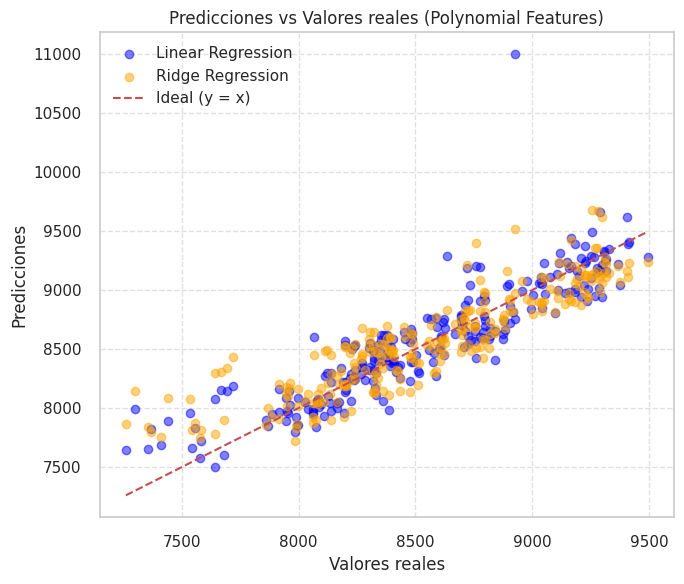

In [ ]:
# Generamos las nuevas características polinómicas de grado 2
poly = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly.fit_transform(X_train_sel)
X_test_poly = poly.transform(X_test_sel)

# Ajuste de regresión lineal
lin_poly = LinearRegression().fit(X_train_poly, y_train)
y_pred_lin = lin_poly.predict(X_test_poly)

# Estandarización para Ridge
sc_poly = StandardScaler().fit(X_train_poly)
X_train_poly_s = sc_poly.transform(X_train_poly)
X_test_poly_s  = sc_poly.transform(X_test_poly)

# Ajuste de regresión Ridge
ridge_poly = Ridge(alpha=ridge_cv_sel.alpha_).fit(X_train_poly_s, y_train)
y_pred_ridge = ridge_poly.predict(X_test_poly_s)

# Evaluación de los modelos
r2_lin = r2_score(y_test, y_pred_lin)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print("Resultados con características polinómicas ===")
print(f"Linear Regression -> R2: {r2_lin: .3f}, MSE: {mse_lin: .3f}")
print(f"Ridge Regression  -> R2: {r2_ridge: .3f}, MSE: {mse_ridge: .3f}")
print('-' * 90)

# Representación: predicciones vs valores reales
plt.figure(figsize = (7, 6))

# Puntos de predicciones
plt.scatter(y_test, y_pred_lin, alpha=0.5, label="Linear Regression", color="blue")
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label="Ridge Regression", color="orange")
# Línea de referencia (perfecto ajuste)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", label="Ideal (y = x)")

plt.title("Predicciones vs Valores reales (Polynomial Features)")
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Al añadir términos polinómicos de grado 2 se capturan interacciones entre variables, lo que puede mejorar la capacidad predictiva si esas interacciones son relevantes. Sin embargo, el modelo lineal simple puede sobreajustar; Ridge suele ofrecer un mejor equilibrio entre ajuste y generalización en presencia de muchas nuevas variables.

Las nuevas características generadas por PolynomialFeatures incluyen tanto los términos cuadrados de cada variable como todas las combinaciones de dos en dos (interacciones). Esto permite que el modelo capture relaciones no lineales y dependencias cruzadas entre variables predictoras que antes no podían representarse mediante una regresión lineal simple, el mayor problema de usar la regresión polinómica es que nos crecen significativamente el número de variables, pero en este case esta justificado porque aumenta mucho la variabilidad del modelo (R² = 0.781)